In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

2022-09-13 18:51:19.827512: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-13 18:51:19.882938: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-13 18:51:19.882955: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
data = pd.read_csv("datasets/spam_or_not_spam.csv")
data

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


In [3]:
data.dropna(inplace=True)

In [4]:
X = data["email"].values
y = data["label"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
tokenizer = Tokenizer(num_words=250, oov_token="x")
tokenizer.fit_on_texts(X_train)

kalimat_train = tokenizer.texts_to_sequences(X_train)
kalimat_test = tokenizer.texts_to_sequences(X_test)

pading_train = pad_sequences(kalimat_train)
pading_test = pad_sequences(kalimat_test)

In [6]:
model = Sequential([
    layers.Embedding(250, 16),
    layers.GlobalAveragePooling1D(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid")
])

2022-09-13 18:51:24.489344: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-13 18:51:24.489367: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-13 18:51:24.489399: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (parrot-swiftsf31459): /proc/driver/nvidia/version does not exist
2022-09-13 18:51:24.489720: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

In [32]:
history = model.fit(pading_train, y_train, 
                    validation_data=(pading_test, y_test), 
                    epochs=40, verbose=2)

Epoch 1/40
75/75 - 2s - loss: 0.5508 - accuracy: 0.8220 - val_loss: 0.4483 - val_accuracy: 0.8333 - 2s/epoch - 27ms/step
Epoch 2/40
75/75 - 1s - loss: 0.4535 - accuracy: 0.8337 - val_loss: 0.4470 - val_accuracy: 0.8333 - 1s/epoch - 17ms/step
Epoch 3/40
75/75 - 1s - loss: 0.4583 - accuracy: 0.8337 - val_loss: 0.4470 - val_accuracy: 0.8333 - 1s/epoch - 15ms/step
Epoch 4/40
75/75 - 1s - loss: 0.4529 - accuracy: 0.8337 - val_loss: 0.4455 - val_accuracy: 0.8333 - 1s/epoch - 14ms/step
Epoch 5/40
75/75 - 1s - loss: 0.4594 - accuracy: 0.8337 - val_loss: 0.4438 - val_accuracy: 0.8333 - 1s/epoch - 15ms/step
Epoch 6/40
75/75 - 1s - loss: 0.4547 - accuracy: 0.8337 - val_loss: 0.4439 - val_accuracy: 0.8333 - 1s/epoch - 14ms/step
Epoch 7/40
75/75 - 1s - loss: 0.4584 - accuracy: 0.8337 - val_loss: 0.4450 - val_accuracy: 0.8333 - 1s/epoch - 15ms/step
Epoch 8/40
75/75 - 1s - loss: 0.4553 - accuracy: 0.8337 - val_loss: 0.4414 - val_accuracy: 0.8333 - 1s/epoch - 14ms/step
Epoch 9/40
75/75 - 1s - loss: 0.

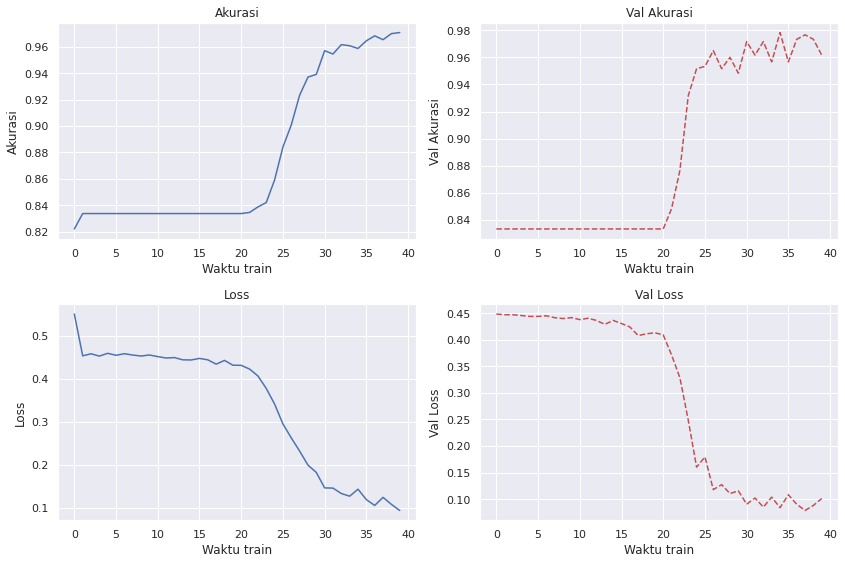

In [33]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(12,8))
ax1.plot(history.history["accuracy"])
ax1.set_title("Akurasi")
ax1.set_xlabel("Waktu train")
ax1.set_ylabel("Akurasi")

ax2.plot(history.history["val_accuracy"], "r--")
ax2.set_title("Val Akurasi")
ax2.set_xlabel("Waktu train")
ax2.set_ylabel("Val Akurasi")

ax3.plot(history.history["loss"])
ax3.set_title("Loss")
ax3.set_xlabel("Waktu train")
ax3.set_ylabel("Loss")

ax4.plot(history.history["val_loss"], "r--")
ax4.set_title("Val Loss")
ax4.set_xlabel("Waktu train")
ax4.set_ylabel("Val Loss")
plt.tight_layout()

In [39]:
teks = [
    "hendri"
]

tokenizer.fit_on_texts(teks)
kalimat_teks = tokenizer.texts_to_sequences(teks)
pading_teks = pad_sequences(kalimat_teks)

y_pred = model.predict(pading_teks)

y_pred = np.round(y_pred).reshape(1,-1)
y_pred

1/1 [==============================] - 0s 12ms/step


array([[0.]], dtype=float32)

In [35]:
y_pred = model.predict(pading_test)
y_pred = np.round(y_pred)
 
confusion_matrix(y_test, y_pred)

19/19 [==============================] - 0s 1ms/step


array([[482,  18],
       [  5,  95]])

In [12]:
model.evaluate(pading_test,y_test)

19/19 [==============================] - 0s 4ms/step - loss: 0.1260 - accuracy: 0.9583


[0.12599076330661774, 0.9583333134651184]

In [13]:
data[(data["label"] == 0)].iloc[10:31]

,email,label
10,hello have you seen and discussed this article...,0
11,yes great minds think alike but even withput e...,0
12,on mon aug NUMBER NUMBER at NUMBER NUMBER NUMB...,0
13,from chris garrigues cwg exmh deepeddy com da...,0
14,spamassassin is hurting democracy owen URL int...,0
15,hi all apologies for the possible silly questi...,0
16,in forteana y d mcmann dmcmann b wrote robert...,0
17,in a nutshell solaris is suns own flavour of u...,0
18,apols if this has been posted before URL rob y...,0
19,can someone explain what type of operating sys...,0
